<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Code-/blob/main/%EC%83%81%EC%A0%90_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C%EB%A7%A4%EC%B6%9C_Solution%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

In [17]:
train = pd.read_csv('/content/funda_train.csv')
submission = pd.read_csv('/content/submission.csv')

In [18]:
train.shape

(365125, 9)

In [19]:
train.tail()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
365120,102,254609,a,2017-08-14,20:25,0,NaN,NaN,7142.857143
365121,102,254610,c,2017-08-15,14:27,0,NaN,NaN,3571.428571
365122,102,254611,b,2017-08-15,17:42,0,NaN,NaN,2857.142857
365123,102,254501,g,2017-08-15,19:01,0,NaN,NaN,1428.571429
365124,102,254612,g,2017-08-15,19:14,0,NaN,NaN,35.000000


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365125 entries, 0 to 365124
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   store_id          365125 non-null  int64  
 1   card_id           365125 non-null  int64  
 2   card_company      365125 non-null  object 
 3   transacted_date   365125 non-null  object 
 4   transacted_time   365125 non-null  object 
 5   installment_term  365125 non-null  int64  
 6   region            269959 non-null  object 
 7   type_of_business  138857 non-null  object 
 8   amount            365125 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 25.1+ MB


In [22]:
train.describe()

,store_id,card_id,installment_term,amount
count,365125.000000,365125.000000,365125.000000,3.651250e+05
mean,51.212116,130567.754977,0.147059,9.925018e+03
std,29.723009,72060.215885,1.266552,2.824067e+04
min,0.000000,0.000000,0.000000,-1.016298e+06
25%,27.000000,67269.000000,0.000000,1.714286e+03
50%,50.000000,131658.000000,0.000000,3.714286e+03
75%,80.000000,196139.000000,0.000000,8.142857e+03
max,102.000000,254612.000000,60.000000,1.214286e+06


### 자체 개발 EDA

In [6]:
def calcul_column_len(df,colname): # unique 데이터 갯수 반환
  df_col = df[colname]
  cols = df_col.unique()
  return len(cols)

In [7]:
for i in train.columns:
  result_str = f'{i} 수: ' + str(calcul_column_len(train,i))
  print(result_str)

store_id 수: 6
card_id 수: 10002
card_company 수: 8
transacted_date 수: 996
transacted_time 수: 848
installment_term 수: 9
region 수: 3
type_of_business 수: 3
amount 수: 374


## 분석 환경 설정 ( 1등 알고리즘 ) 

In [8]:
pip install tzlocal

In [9]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 4.5 MB/s 
     |████████████████████████████████| 9.5 MB 44.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [10]:
pip install statsmodels

In [11]:
pip install tqdm

In [12]:
import rpy2

In [13]:
rpy2.__version__

'3.4.5'

In [14]:
import pandas as pd
import numpy as np

pd.__version__, np.__version__

('1.1.5', '1.19.5')

In [15]:
import pmdarima

pmdarima.__version__

'1.8.2'

In [16]:
import statsmodels
import tqdm
import seaborn as sns

statsmodels.__version__, tqdm.__version__, sns.__version__

('0.12.2', '4.62.0', '0.11.1')

### 시작

In [23]:
from tqdm import tqdm 
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

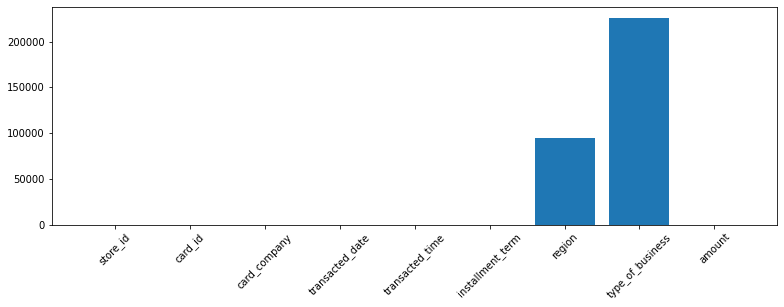

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,4))
plt.bar(train.columns, train.isnull().sum())
plt.xticks(rotation=45)

In [26]:
### 열 전체 제거

In [27]:
train = train.drop(['region','type_of_business'],axis=1)
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
0,0,0,b,2016-06-01,13:13,0,1857.142857
1,0,1,h,2016-06-01,18:12,0,857.142857
2,0,2,c,2016-06-01,18:52,0,2000.000000
3,0,3,a,2016-06-01,20:22,0,7857.142857
4,0,4,c,2016-06-02,11:06,0,2000.000000


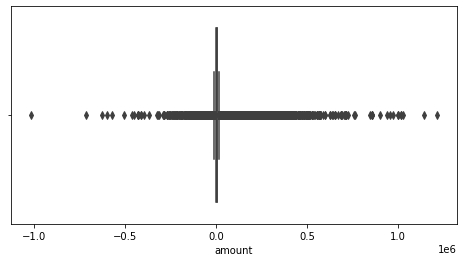

In [28]:
### 매출액 이상치 확인

plt.figure(figsize=(8,4))
sns.boxplot(train['amount'])

In [29]:
### 매출액<0 , 환불 일어난 행
train[train['amount']<0].head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
41,0,40,a,2016-06-10,17:26,2,-8571.428571
347,0,285,a,2016-08-04,17:52,0,-1857.142857
731,0,473,g,2016-10-17,10:32,0,-2000.000000
831,0,230,b,2016-11-03,15:36,0,-85.714286
944,0,138,a,2016-11-28,13:21,0,-57.142857
